<a href="https://colab.research.google.com/github/CristyanHenrich/YOLOv4-Detec-oDeObjetosOpenCV/blob/master/YOLO_v4_Detec%C3%A7%C3%A3o_de_Objetos_com_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
path = '/content/gdrive/MyDrive/Colab Notebooks/DetecçãoDeObjetosComYolo/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [7]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])
labels_path

'/content/cfg/coco.names'

In [8]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
len(LABELS)

80

In [10]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [11]:
net = cv2.dnn.readNet(config_path, weights_path)

In [12]:
net

< cv2.dnn.Net 0x7d0330d436b0>

In [ ]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

In [14]:
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print('Total de camadas: ' + str(len(ln)))

Todas as camadas
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [15]:
print('Camadas de saida')
print(net.getUnconnectedOutLayers())

Camadas de saida
[327 353 379]


In [16]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

In [17]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

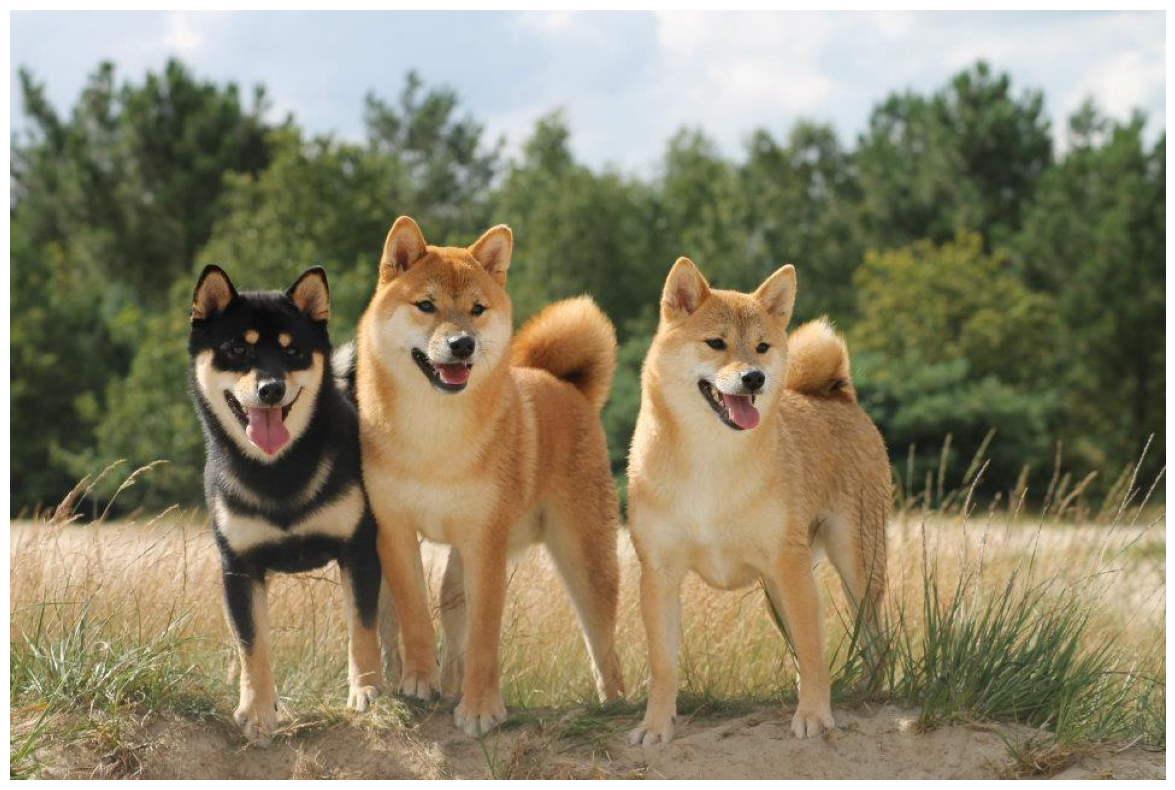

In [18]:
imagem = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/DetecçãoDeObjetosComYolo/imagens/cachorros.jpg')
mostrar(imagem)

In [19]:
imagem_cp = imagem.copy()

In [20]:
imagem.shape

(640, 960, 3)

In [21]:
(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 640
Largura: 960


In [22]:
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()

print('YOLO levou {:.2f} segundos'.format(termino - inicio))

YOLO levou 4.56 segundos


In [23]:
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

In [24]:
layer_outputs[0]

array([[0.01100558, 0.01021743, 0.02264772, ..., 0.        , 0.        ,
        0.        ],
       [0.01492394, 0.01543288, 0.03303435, ..., 0.        , 0.        ,
        0.        ],
       [0.01701084, 0.01489796, 0.05110351, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
        0.        ],
       [0.98667467, 0.9842644 , 0.03099856, ..., 0.        , 0.        ,
        0.        ],
       [0.9830682 , 0.9859079 , 0.0597507 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [25]:
layer_outputs[1]

array([[0.03031929, 0.0320848 , 0.10433294, ..., 0.        , 0.        ,
        0.        ],
       [0.0329858 , 0.03253518, 0.13059318, ..., 0.        , 0.        ,
        0.        ],
       [0.0312387 , 0.03151371, 0.15157267, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96770096, 0.96682906, 0.06866277, ..., 0.        , 0.        ,
        0.        ],
       [0.96435654, 0.96775067, 0.09513659, ..., 0.        , 0.        ,
        0.        ],
       [0.9661032 , 0.9677124 , 0.10772248, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [26]:
layer_outputs[2]

array([[0.06402372, 0.06951444, 0.15857781, ..., 0.        , 0.        ,
        0.        ],
       [0.0616472 , 0.05672149, 0.31426504, ..., 0.        , 0.        ,
        0.        ],
       [0.03240769, 0.0500917 , 0.7458859 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.93245447, 0.9313108 , 0.2066342 , ..., 0.        , 0.        ,
        0.        ],
       [0.9336966 , 0.93029344, 0.29772216, ..., 0.        , 0.        ,
        0.        ],
       [0.9512335 , 0.95295554, 0.5208086 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [27]:
layer_outputs[2], layer_outputs[2][0], len(layer_outputs[2][0])

(array([[0.06402372, 0.06951444, 0.15857781, ..., 0.        , 0.        ,
         0.        ],
        [0.0616472 , 0.05672149, 0.31426504, ..., 0.        , 0.        ,
         0.        ],
        [0.03240769, 0.0500917 , 0.7458859 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93245447, 0.9313108 , 0.2066342 , ..., 0.        , 0.        ,
         0.        ],
        [0.9336966 , 0.93029344, 0.29772216, ..., 0.        , 0.        ,
         0.        ],
        [0.9512335 , 0.95295554, 0.5208086 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([6.4023718e-02, 6.9514439e-02, 1.5857781e-01, 3.4840187e-01,
        4.2169395e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0

In [28]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]
    if confianca > threshold:
      print('scores: ' + str(scores))
      print('classe mais provavel: ' + str(classeID))
      print('confianca: ' + str(confianca))

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.6059549 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.       ]
classe mais provavel: 16
confianca: 0.6059549
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9570457 0.        0.        0.        0.
 0.       

In [29]:
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 16)

In [30]:
print(confiancas), len(confiancas)

[0.6059548854827881, 0.9570456743240356, 0.889125406742096, 0.9090498685836792, 0.9525650143623352, 0.7894679307937622, 0.9860403537750244, 0.9869317412376404, 0.6623756885528564, 0.6959598064422607, 0.9729039072990417, 0.9767161011695862, 0.8875229358673096, 0.8976888060569763, 0.9810120463371277, 0.9824249744415283]


(None, 16)

In [31]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 16)

In [32]:
LABELS[16]

'dog'

In [35]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)
objs

array([ 7, 15, 11], dtype=int32)

In [38]:
confiancas[7], confiancas[15], confiancas[11]

(0.9869317412376404, 0.9824249744415283, 0.9767161011695862)

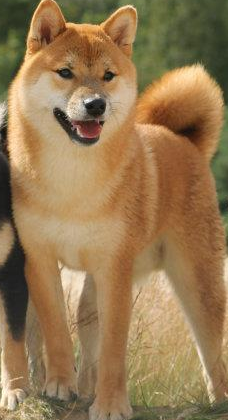

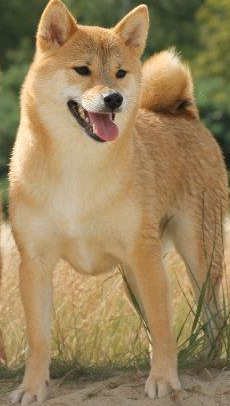

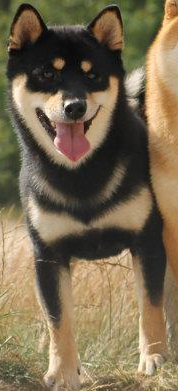

In [45]:
if len(objs) > 0:
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])

    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[IDclasses[i]]]

    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

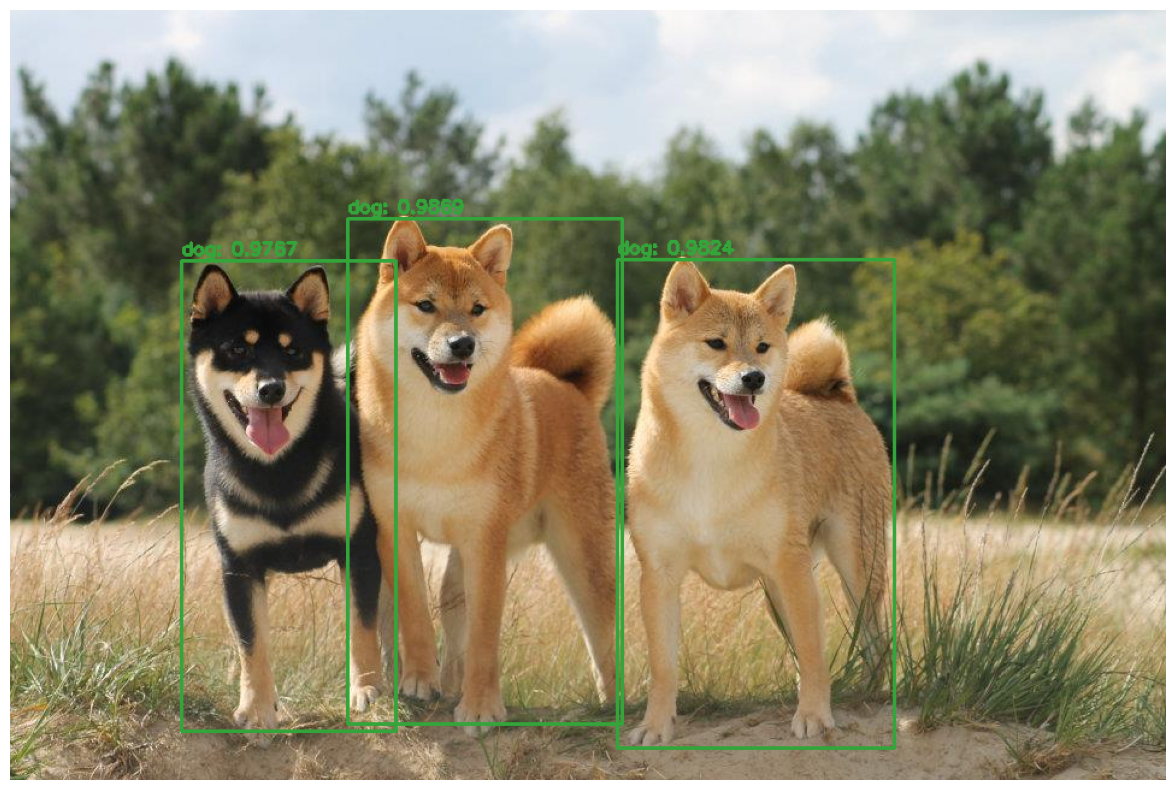

In [46]:
mostrar(imagem)

In [47]:
cv2.imwrite('resultado.jpg', imagem)

True